In [21]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data_path= r"..\data\dataset_cleaned.csv"

In [24]:
# data_path= r"..\data\dataset_raw_withMaliciousURLCountColumnJ.csv"

In [25]:
df=pd.read_csv(data_path)

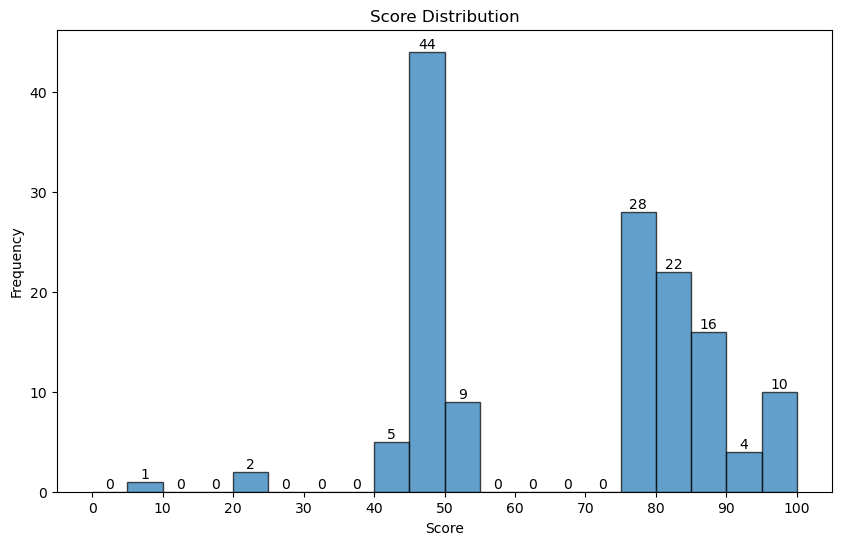

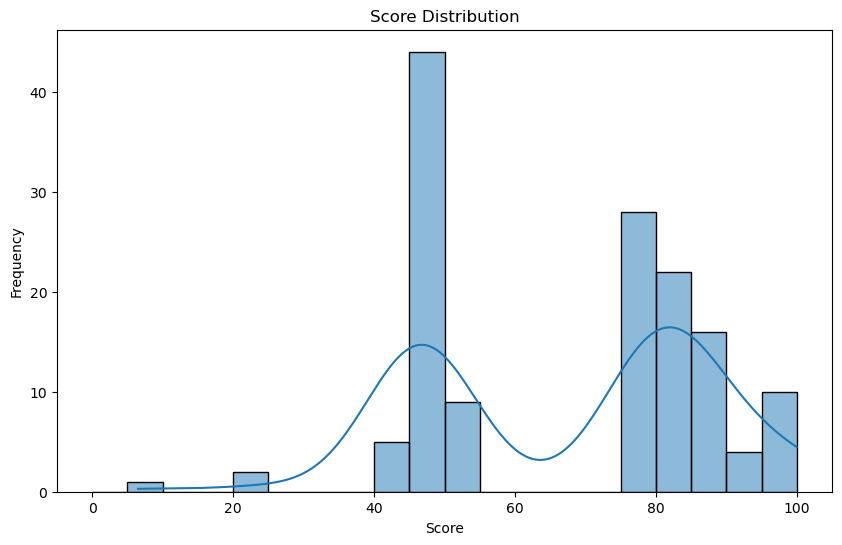

In [27]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['score'], bins=bins, edgecolor='k', alpha=0.7)
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')
plt.title('Score Distribution')
plt.xticks(range(0, 101, 10))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# 使用 seaborn 绘制分布图
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=bins, kde=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [36]:
df['score_category'] = df['score'].apply(lambda x: -1 if x <= 35 else (0 if x <= 65 else 1))

In [41]:
df['score_category'] = df['score'].apply(lambda x: -1 if x <= 65  else 1)

In [35]:
df.to_csv(r"..\data\dataset_cleaned_score_cat_3group.csv")

In [37]:
df.loc[df['score_category']==-1]

,score,Malicious URL count,android_target_sdk_min,uses_http,apk_leaked_data_sdcard,keysize_check,world_writable_files_check,world_readable_files_check,allow_backup_check,secure_random_check,...,leaked_data_in_files_imei,leaked_data_in_files_localwifimac,leaked_data_in_files_serial,leaked_data_in_files_surrounding_wifi_network_ssid,leaked_data_in_files_username,leaked_data_in_files_wifi_mac,leaked_data_in_files_zipcode,dynamic_code_loading_check,javascript_interface_check,score_category
75,24.9,8.0,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,-1
80,6.5,22.0,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,True,-1
102,24.9,3.0,True,True,False,True,True,True,False,True,...,False,False,False,False,False,False,True,False,True,-1


In [39]:
# Three most risky app (title - score)
# US Divorce Single Parents Meet - 24.9
# Muslim Assistant - Prayer Times, Azan, Qibla - 6.5
# Baby Shark TV: Songs & Stories - 24.9


In [68]:
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
# from sklearn.datasets import load_iris
from matplotlib.ticker import MultipleLocator
from sklearn.datasets import load_digits

from sklearn.datasets import fetch_lfw_people
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
def neural_network(X_train, X_test, y_train, y_test,graph=False,max_iter=700,size=70):
    mlp_clf = MLPClassifier(hidden_layer_sizes=(size, size), max_iter=max_iter)
    mlp_clf.fit(X_train, y_train)
    # y_pred = mlp_clf.predict(X_test)
    train_score = mlp_clf.score(X_train, y_train)
    test_score = mlp_clf.score(X_test, y_test)
    return train_score,test_score,mlp_clf

def test_dataset_split(X,y,gtid):
    test_sizes=np.arange(0.1, 1.0, 0.05)
    train_scores=[]
    test_scores=[]
    iters=100
    for test_size in test_sizes:
        train_scores_total=0
        test_scores_total=0
        for i in range(iters):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            train_score,test_score,mlp_clf=neural_network(X_train, X_test, y_train, y_test,graph=False,size=70,max_iter=700)
            train_scores_total=train_scores_total+train_score
            test_scores_total=test_scores_total+test_score
        train_scores.append(train_scores_total/iters)
        test_scores.append(test_scores_total/iters)  
    fig, ax = plt.subplots()
    ax.set_xlabel("Test ratio")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy vs Test set ratio for training and testing sets")
    ax.plot(test_sizes, train_scores, marker="o", label="train")
    ax.plot(test_sizes, test_scores, marker="o", label="test")
    ax.grid()
    

In [69]:
from sklearn.preprocessing import StandardScaler
x_columns=list(df.columns)
if 'score' in x_columns:
    x_columns.remove('score')
    x_columns.remove('score_category')
y=df['score_category']
x=df[x_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [70]:
gtid=903789757

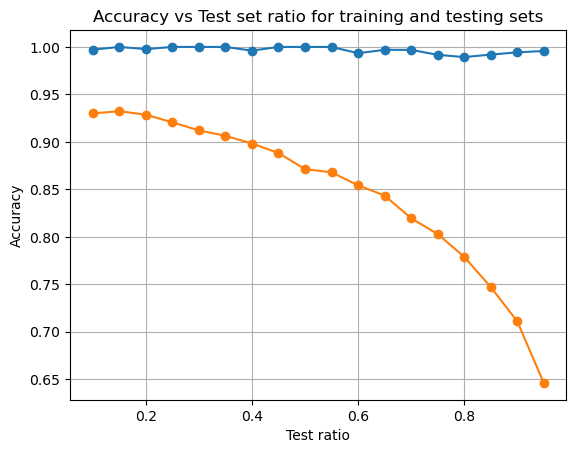

In [71]:
test_dataset_split(x,y,gtid)